In [1]:
import pandas as pd

In [2]:
kt_url = 'https://health.data.ny.gov/resource/rmwa-zns4.json?ccs_procedure_code=105&$limit=10000'

In [3]:
kidney_transplants = pd.read_json(kt_url)

In [4]:
len(kidney_transplants.length_of_stay)

1169

In [5]:
kidney_transplants.head(10)

,abortion_edit_indicator,admit_day_of_week,age_group,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_medical_surgical_description,apr_risk_of_mortality,apr_severity_of_illness_code,...,operating_provider_license_number,patient_disposition,race,source_of_payment_1,source_of_payment_2,source_of_payment_3,total_charges,total_costs,type_of_admission,zip_code_3_digits
0,N,MON,50 to 69,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Medicare,Self-Pay,164379.11,600007.65,Elective,142
1,N,THU,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Major,3,...,90003252,Home or Self Care,Black/African American,Medicare,Medicaid,Self-Pay,193742.47,617385.16,Urgent,142
2,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,1,...,216816,Home or Self Care,White,Medicare,Self-Pay,NaN,125838.17,415105.69,Elective,136
3,N,WED,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,2,...,90003252,Home or Self Care,White,Medicaid,Self-Pay,NaN,169530.27,602840.63,Elective,142
4,N,WED,50 to 69,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,216816,Home or Self Care,White,Medicare,Medicare,Self-Pay,183224.09,610949.08,Elective,140
5,N,SUN,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,2,...,269820,Home or Self Care,White,Medicare,Medicaid,NaN,166918.35,602750.72,Elective,142
6,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,2,...,216816,Home or Self Care,Black/African American,Medicare,Self-Pay,Self-Pay,164177.35,600185.78,Urgent,142
7,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,3,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Self-Pay,NaN,125849.82,415613.18,Elective,142
8,N,TUE,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Minor,1,...,269820,Home or Self Care,White,Medicare,Self-Pay,NaN,179106.21,608262.72,Elective,142
9,N,MON,30 to 49,440,KIDNEY TRANSPLANT,11,Diseases and Disorders of the Kidney and Urina...,Surgical,Moderate,1,...,216816,Home or Self Care,White,Blue Cross/Blue Shield,Self-Pay,NaN,121158.45,413673.49,Elective,142


In [6]:
%matplotlib inline

In [7]:
import seaborn as sb

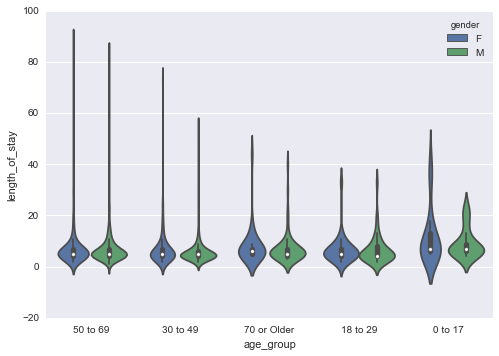

In [8]:
sb.violinplot(x="age_group", y="length_of_stay", hue="gender", data=kidney_transplants)

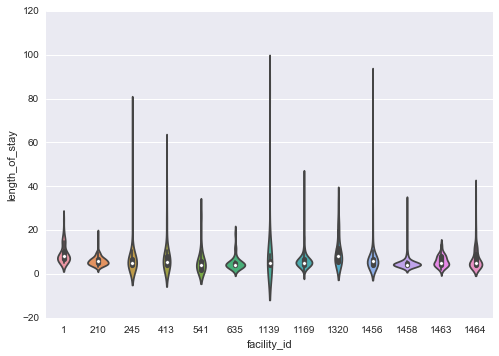

In [9]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants)

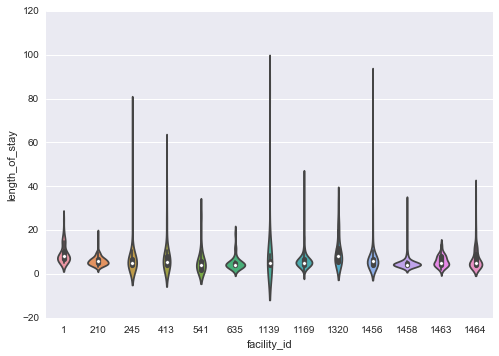

In [23]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants)

In [22]:
kidney_transplants_outliers_removed = kidney_transplants.where(kidney_transplants["length_of_stay"] <= 40)

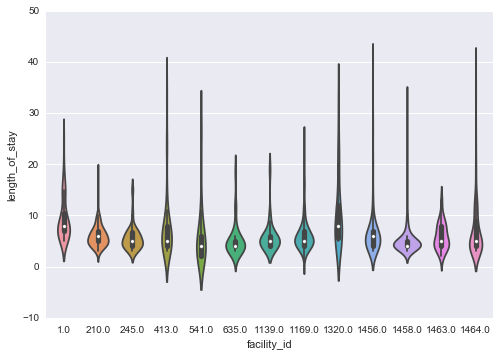

In [24]:
sb.violinplot(x="facility_id", y="length_of_stay", data=kidney_transplants_outliers_removed)

In [19]:
kidney_transplants["facility_name_with_id"] = kidney_transplants.apply(
    lambda x: str("000" + str(int(x["facility_id"])))[-4:] + " - " + x["facility_name"], axis=1)

In [20]:
kidney_transplants.groupby(["facility_name_with_id"])["length_of_stay"].mean()

facility_name_with_id
0001 - Albany Medical Center Hospital                                     9.327273
0210 - Erie County Medical Center                                         6.148649
0245 - University Hospital                                                6.762712
0413 - Strong Memorial Hospital                                           9.250000
0541 - North Shore University Hospital                                    6.137931
0635 - University Hospital SUNY Health Science Center                     5.265625
1139 - Westchester Medical Center                                         8.703704
1169 - Montefiore Medical Center - Henry & Lucy Moses Div                 6.477419
1320 - University Hospital of Brooklyn                                   10.521739
1456 - Mount Sinai Hospital                                               7.228395
1458 - New York Presbyterian Hospital - New York Weill Cornell Center     5.246445
1463 - NYU Hospitals Center                                      

In [21]:
kidney_transplants.groupby(["facility_name_with_id"])["length_of_stay"].count()

facility_name_with_id
0001 - Albany Medical Center Hospital                                     55
0210 - Erie County Medical Center                                         74
0245 - University Hospital                                                59
0413 - Strong Memorial Hospital                                           60
0541 - North Shore University Hospital                                    29
0635 - University Hospital SUNY Health Science Center                     64
1139 - Westchester Medical Center                                         27
1169 - Montefiore Medical Center - Henry & Lucy Moses Div                155
1320 - University Hospital of Brooklyn                                    23
1456 - Mount Sinai Hospital                                              162
1458 - New York Presbyterian Hospital - New York Weill Cornell Center    211
1463 - NYU Hospitals Center                                               25
1464 - New York Presbyterian Hospital - Columbia Presb

In [25]:
kidney_transplants.groupby(["patient_disposition", "facility_name"])["length_of_stay"].count()

patient_disposition                facility_name                                                 
Expired                            Montefiore Medical Center - Henry & Lucy Moses Div                  3
                                   NYU Hospitals Center                                                1
                                   New York Presbyterian Hospital - Columbia Presbyterian Center       1
                                   North Shore University Hospital                                     1
                                   University Hospital                                                 1
Home or Self Care                  Albany Medical Center Hospital                                     45
                                   Erie County Medical Center                                         71
                                   Montefiore Medical Center - Henry & Lucy Moses Div                113
                                   Mount Sinai Hospital       

In [26]:
kidney_transplants.groupby(["age_group"])["length_of_stay"].count()

age_group
0 to 17         48
18 to 29        74
30 to 49       369
50 to 69       582
70 or Older     96
Name: length_of_stay, dtype: int64

In [27]:
kidney_transplants.groupby(["age_group"])["length_of_stay"].mean()

age_group
0 to 17        10.479167
18 to 29        6.675676
30 to 49        6.203252
50 to 69        6.817869
70 or Older     7.489583
Name: length_of_stay, dtype: float64

In [28]:
kidney_transplants.columns

Index([            u'abortion_edit_indicator',
                         u'admit_day_of_week',
                                 u'age_group',
                              u'apr_drg_code',
                       u'apr_drg_description',
                              u'apr_mdc_code',
                       u'apr_mdc_description',
          u'apr_medical_surgical_description',
                     u'apr_risk_of_mortality',
              u'apr_severity_of_illness_code',
       u'apr_severity_of_illness_description',
         u'attending_provider_license_number',
                              u'birth_weight',
                        u'ccs_diagnosis_code',
                 u'ccs_diagnosis_description',
                        u'ccs_procedure_code',
                 u'ccs_procedure_description',
                     u'discharge_day_of_week',
                            u'discharge_year',
            u'emergency_department_indicator',
                                 u'ethnicity',
             

In [29]:
kidney_transplants.groupby(["patient_disposition"])["length_of_stay"].count()

patient_disposition
Expired                                7
Home or Self Care                    802
Home w/ Home Health Services         341
Hospice - Home                         1
Inpatient Rehabilitation Facility      9
Skilled Nursing Home                   9
Name: length_of_stay, dtype: int64

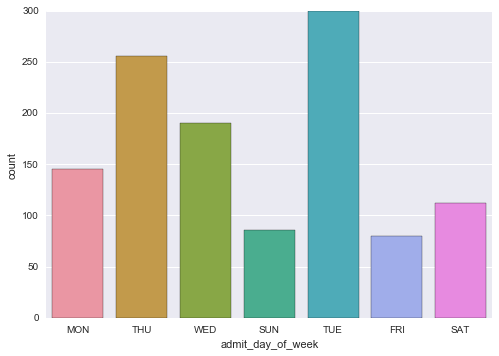

In [30]:
sb.countplot(x="admit_day_of_week", data=kidney_transplants)

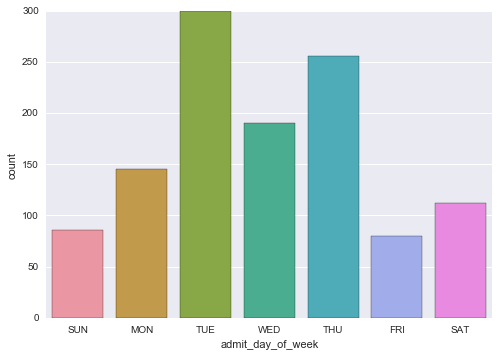

In [31]:
sb.countplot(x="admit_day_of_week", data=kidney_transplants, order=["SUN","MON", "TUE", "WED", "THU", "FRI", "SAT"])

In [32]:
kidney_transplants.to_csv("./data/sparcs_ny_kidney_transplants_2014.csv")